# 2. Imágenes como arreglos

Al final de la introducción vimos que las imágenes se importan como una estructura de datos específica llamada un `array`. Estos arreglos son implementados por un paquete llamado Numpy, que es fundamental para todo el ecosistema científico de Python: tan pronto como tengas que realizar cálculos numéricos, es muy probable que uses arreglos de Numpy. Aquí te ofrecemos una introducción a estos arreglos, utilizando imágenes como ejemplos.

Primero importemos el paquete Numpy, así como OpenCV  para importar las imágenes, y Matplotlib, que nos permitirá visualizar las imágenes:


In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Importar una imagen desde un repositorio en línea

Ahora importaremos una imagen desde un repositorio en línea utilizando una URL. Esta es una imagen de microscopía de fluorescencia de *Saccharomyces cerevisiae*, con una señal que se acumula en los vacuolos.


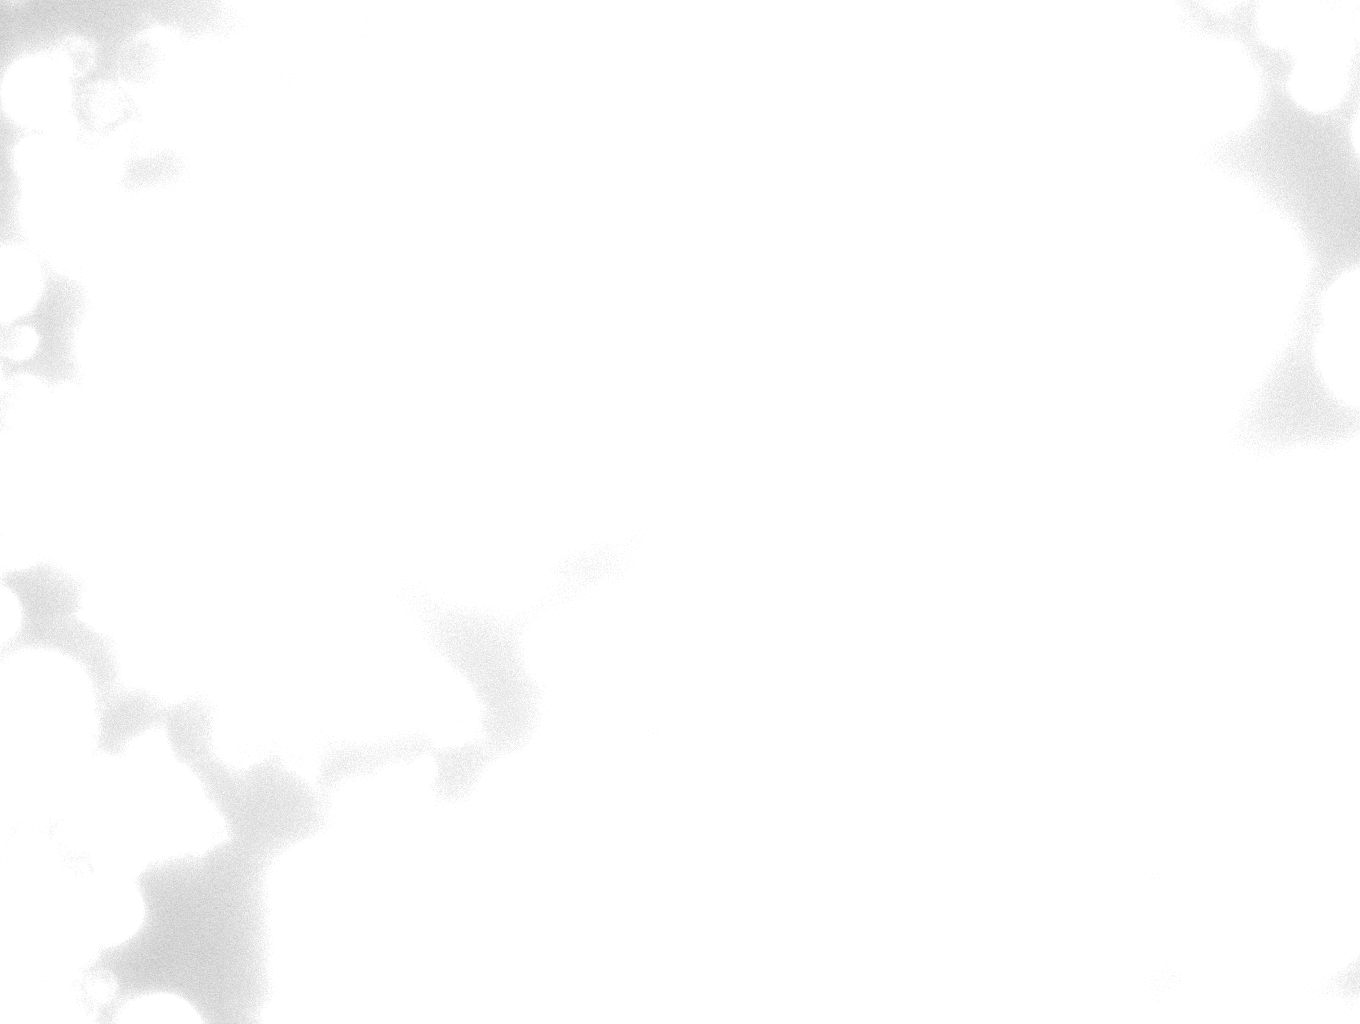

In [21]:
import cv2
import numpy as np
import urllib.request
from google.colab.patches import cv2_imshow

# URL de la imagen en formato TIFF
my_address = 'https://cildata.crbs.ucsd.edu/media/images/13901/13901.tif'

# Cargar la imagen desde la URL
resp = urllib.request.urlopen(my_address)
image_data = np.asarray(bytearray(resp.read()), dtype="uint8")

# Decodificar la imagen TIFF correctamente
image = cv2.imdecode(image_data, cv2.IMREAD_UNCHANGED)  # cv2.IMREAD_UNCHANGED para soportar múltiples canales y transparencia

# Verifica si la imagen es en escala de grises o en color
if len(image.shape) == 3:
    # Convertir la imagen de BGR a RGB si tiene 3 canales
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2_imshow(image_rgb)
else:
    # Mostrar la imagen en escala de grises directamente
    cv2_imshow(image)

In [22]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [23]:
type(image)

numpy.ndarray

Como nos indica el tipo de dato y podemos ver en la salida, la función de importación nos ha devuelto un arreglo Numpy o simplemente un array. "nd" significa n-dimensional, ya que Numpy puede manejar datos de cualquier dimensión. La salida anterior solo nos muestra una fracción de la imagen, donde el ```...``` indica valores que no se muestran.

Hemos visto en la introducción que cualquier variable en Python es más que solo una variable: también tiene funciones (métodos) y propiedades. Esto también es válido para los arrays de Numpy. Por ejemplo, podemos consultar cuál es la forma (shape) del array:


In [24]:
image.shape

(1024, 1360)

Estos números nos dicen que nuestro array tiene 1024 líneas y 1360 columnas. En la salida anterior también vemos una indicación de ```dtype```. Esto nos indica cuál es el tipo de los píxeles dentro del array. La variable ```image``` es un array, pero su contenido puede variar: podríamos tener valores de punto flotante, enteros, etc. Aquí, ```uint16``` nos dice que tenemos enteros sin signo (sin valores negativos) en 16 bits, es decir, hasta $2^{16}$ posibles valores de píxeles diferentes.

Hemos visto en la introducción que podríamos mostrar la imagen usando la función ```imshow```. Hagámoslo aquí:


https://matplotlib.org/stable/users/explain/colors/colormaps.html

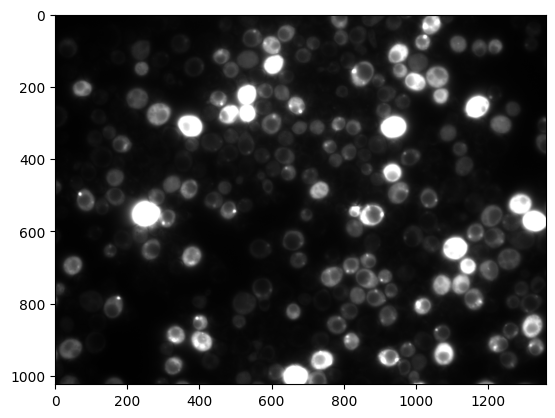

In [28]:
plt.imshow(image, cmap='gray');

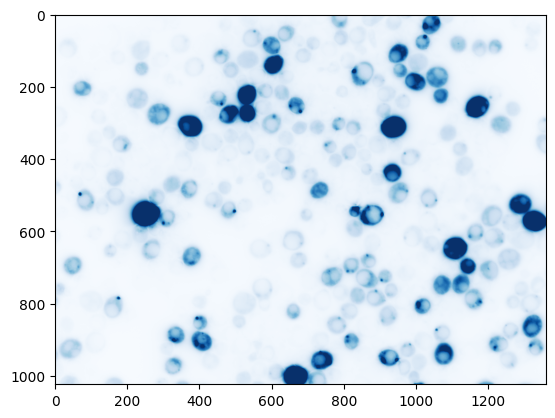

In [27]:
plt.imshow(image, cmap='Blues');

Además de la entrada ```image```, también utilizamos un parámetro *opcional* llamado ```cmap``` aquí, lo que nos permite establecer un mapa de colores específico, en este caso, uno en escala de grises. Puedes encontrar más información aquí: [Colormaps de Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html#sequential)


## Accediendo a los valores

Podemos mostrar nuevamente una parte del array:

In [29]:
image

array([[219, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

La primera pregunta es: ¿cómo extraemos un valor específico del array? Cada uno de los números que vemos arriba representa un píxel y tiene una ubicación (fila, columna). Podemos usar esa ubicación para "extraer" el valor del array. Por ejemplo, si queremos el píxel de la esquina superior izquierda en ```fila=0``` y ```columna=0```, usamos estas coordenadas dentro de **corchetes**:


In [33]:
image[2,1]

217

Ahora incluso podemos cambiar ese valor reasignando otro:

In [34]:
image[0,0] = 2

In [35]:
image

array([[  2, 225, 220, ..., 256, 258, 272],
       [218, 211, 217, ..., 270, 268, 278],
       [217, 217, 214, ..., 263, 268, 262],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

¡Vemos que, de hecho, hemos cambiado el valor de ese píxel en la esquina superior izquierda!


## Acceder a partes de la matriz

Muy a menudo no necesitamos acceder a un solo píxel, sino a toda una región. En otras palabras, queremos **recortar** la imagen. Vamos a ver nuevamente la imagen:


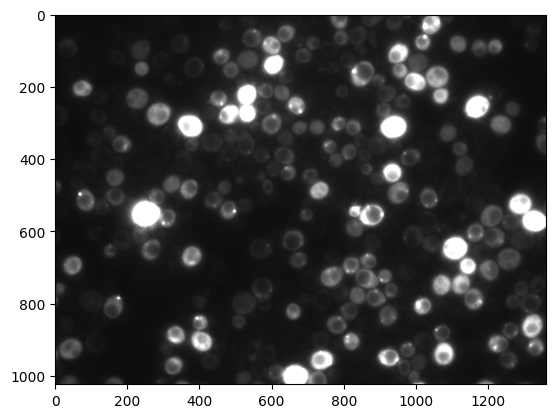

In [38]:
plt.imshow(image, cmap='gray');

Supongamos que queremos centrar nuestra atención en una región en el medio de la imagen. Podemos, por ejemplo, tomar las filas 400-530 y las columnas 400-600. En lugar de usar solo coordenadas individuales, ahora podemos extraer esa parte de la imagen usando un **rango** de píxeles, el rango se indica mediante el símbolo ```:```. Aquí escribimos:


Matriz = [filas, columnas], empieza desde 0 --> la primera fila/columna

[n:m,x:y]---> : (intervalo)

In [39]:
image[400:530, 400:600]

array([[375, 352, 370, ..., 470, 452, 469],
       [372, 368, 365, ..., 462, 458, 472],
       [381, 370, 359, ..., 478, 461, 480],
       ...,
       [349, 365, 346, ..., 287, 285, 290],
       [333, 349, 340, ..., 288, 276, 275],
       [355, 351, 337, ..., 282, 274, 267]], dtype=uint16)

Podemos almacenar este nuevo arreglo más pequeño en una nueva variable:

imagenrecortada= image[n:m, x:y] <--- Region de interes

imagenrecortada --> [20,30] ==otro numero

In [128]:
cropped = image[400:, :].copy()

**Ten en cuenta que adicionalmente usamos aquí el método ```copy```. Esto asegura que cualquier modificación que hagamos a la versión recortada no afecte la imagen original**.

Podemos nuevamente graficar esta imagen recortada:

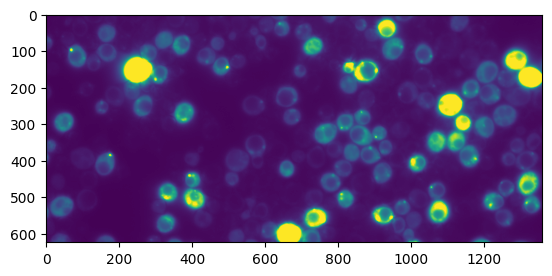

In [129]:
plt.imshow(cropped);

También podemos verificar nuevamente el tamaño de esta imagen recortada. Esperamos 130 filas y 200 columnas:

In [42]:
cropped.shape

(130, 200)

Si en lugar de seleccionar tanto filas como columnas solo queremos seleccionar un rango de filas y tomar **todas** las columnas, simplemente podemos usar `:` solo:


In [45]:
image[400:530, :].shape

(130, 1360)

También podemos omitir el límite *final* y así tomar todas las filas/columnas desde un índice determinado hasta la última:


In [49]:
image[400:, :].shape

(624, 1360)

## Other ways of creating arrays

In addition to create arrays by importing them, we can also generate them using Numpy functions. This can be useful to initialize some array that we can then re-use later.

There are many different types of arrays that we can create. For example we can create arrays that only contain ```0```s or ```1```s and have a certain shape, e.g. 5 rows and 3 columns, using the ```np.zeros()``` and ```np.ones()``` functions:

In [ ]:
np.zeros(shape=(5,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
np.ones(shape=(5,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## Otras formas de crear arreglos

Además de crear arreglos importándolos, también podemos generarlos usando funciones de Numpy. Esto puede ser útil para inicializar algún arreglo que luego podemos reutilizar.

Existen muchos tipos diferentes de arreglos que podemos crear. Por ejemplo, podemos crear arreglos que solo contengan ```0```s o ```1```s y que tengan una cierta forma, por ejemplo, 5 filas y 3 columnas, utilizando las funciones ```np.zeros()``` y ```np.ones()```:


Stop => toda las veces no se cuenta

In [52]:
np.arange(start=4, stop=12, step=2)

array([ 4,  6,  8, 10])

También podemos crear arreglos unidimensionales (solo una fila) con valores distribuidos regularmente. Por ejemplo, podemos crear un arreglo con números desde un valor ```start``` dado hasta un valor ```stop``` con un cierto tamaño de paso ```step```:


In [54]:
np.random.poisson(lam=5, size=(3,5))

array([[8, 6, 6, 3, 5],
       [4, 2, 4, 8, 3],
       [4, 7, 6, 5, 4]])

## Matemáticas con arreglos

Ahora que sabemos cómo crear o importar un arreglo, podemos empezar a hacer matemáticas, o en nuestro caso, procesamiento de imágenes, con estos arreglos. La ventaja de estas estructuras es que podemos hacer matemáticas como si estuviéramos utilizando números simples.


### Cálculo básico

Por ejemplo, podemos escribir la declaración matemática \(y = x + 3\), y podemos escribir lo mismo con un arreglo entero:


In [57]:
cropped

array([[240, 252, 236, ..., 273, 281, 281],
       [241, 249, 258, ..., 270, 274, 263],
       [244, 247, 257, ..., 267, 273, 271],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [67]:
cropped_plus_three = cropped -3

In [68]:
cropped_plus_three

array([[237, 249, 233, ..., 270, 278, 278],
       [238, 246, 255, ..., 267, 271, 260],
       [241, 244, 254, ..., 264, 270, 268],
       ...,
       [334, 340, 318, ..., 263, 284, 282],
       [317, 320, 336, ..., 265, 292, 278],
       [326, 350, 332, ..., 273, 278, 288]], dtype=uint16)

In [69]:
cropped

array([[240, 252, 236, ..., 273, 281, 281],
       [241, 249, 258, ..., 270, 274, 263],
       [244, 247, 257, ..., 267, 273, 271],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

Vemos que la declaración ```cropped + 3``` se convierte por Numpy en "agregar el valor 3 a cada píxel en el arreglo llamado ```cropped```". ¡Así que no tenemos que sumar explícitamente este valor a cada elemento, Numpy lo hace por nosotros!


Puedes utilizar la mayoría de las operaciones comunes con arreglos:


In [60]:
cropped * 3
cropped / 3
cropped - 3

array([[237, 249, 233, ..., 270, 278, 278],
       [238, 246, 255, ..., 267, 271, 260],
       [241, 244, 254, ..., 264, 270, 268],
       ...,
       [334, 340, 318, ..., 263, 284, 282],
       [317, 320, 336, ..., 265, 292, 278],
       [326, 350, 332, ..., 273, 278, 288]], dtype=uint16)

Incluso puedes elevar cada píxel a una cierta potencia utilizando el operador de potencia normal:


In [70]:
a = 3

In [76]:
a ** 3


27

In [77]:
cropped ** 2

array([[57600, 63504, 55696, ...,  8993, 13425, 13425],
       [58081, 62001,  1028, ...,  7364,  9540,  3633],
       [59536, 61009,   513, ...,  5753,  8993,  7905],
       ...,
       [48033, 52113, 37505, ...,  5220, 16833, 15689],
       [36864, 38793, 49385, ...,  6288, 21489, 13425],
       [42705, 59073, 46689, ..., 10640, 13425, 19145]], dtype=uint16)

Nuevamente, esto no es algún tipo de operación de matriz; **la operación de elevar al cuadrado se aplica elemento por elemento**.


### Funciones de Numpy

Además de esta aritmética simple, podemos aplicar **funciones enteras** a estos arreglos. En particular, Numpy tiene una amplia gama de funciones que toman arreglos como entradas. Por ejemplo, podemos calcular el coseno de cada elemento en una imagen utilizando la función ```np.cos()```:


In [78]:
np.cos(cropped)

array([[ 0.32578132,  0.78221214, -0.9284601 , ..., -0.9496871 ,
        -0.17168765, -0.17168765],
       [-0.61954427, -0.6864646 ,  0.9251361 , ...,  0.984382  ,
        -0.776667  ,  0.62646794],
       [ 0.5025704 , -0.3755375 ,  0.81930554, ..., -0.99937433,
        -0.9496871 ,  0.6800014 ],
       ...,
       [-0.66029406, -0.8438378 ,  0.8485543 , ..., -0.510203  ,
        -0.44011596, -0.63334256],
       [ 0.9037051 , -0.83423996,  0.9576682 , ..., -0.5697256 ,
         0.9524222 , -0.17168765],
       [-0.6469423 ,  0.41611943, -0.40810958, ...,  0.89598435,
        -0.17168765, -0.39188495]], dtype=float32)

In [ ]:
np

No crearemos una lista exhaustiva de funciones aquí. Si necesitas una específica, lo más sencillo es buscar en Google usando "numpy nombre_de_tu_operación" y la documentación correspondiente debería aparecer como el primer enlace.

En el ejemplo anterior, hemos utilizado una función que toma un arreglo como entrada y devuelve nuevamente un arreglo (de la misma forma) como salida. Sin embargo, hay funciones que *resumen* el arreglo y que devuelven, por ejemplo, un solo número. Por ejemplo, podemos encontrar el valor máximo en el arreglo:


In [80]:
cropped

array([[240, 252, 236, ..., 273, 281, 281],
       [241, 249, 258, ..., 270, 274, 263],
       [244, 247, 257, ..., 267, 273, 271],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [81]:
np.max(cropped)

4095

De manera similar, también podemos encontrar el valor mínimo, la media, la desviación estándar, etc.


In [82]:
np.min(cropped)

192

In [83]:
np.mean(cropped)

698.3368519042232

In [84]:
np.std(cropped)

758.6538823542196

Finalmente, ten en cuenta que algunas de estas funciones también están disponibles como **métodos** adjuntos a la variable misma. Las dos líneas siguientes son completamente equivalentes:


In [85]:
np.max(cropped)

4095

In [86]:
cropped.max()

4095

### Operaciones entre arreglos

Hasta ahora, solo hemos visto operaciones que utilizan un *solo* arreglo y que modifican el arreglo o calculan alguna estadística. Pero también podemos **combinar** arreglos de diferentes maneras; por ejemplo, podemos sumar dos arreglos. Nuevamente, la operación ocurre **elemento por elemento** y, debido a esto, debemos asegurarnos de que los dos arreglos tengan las **mismas dimensiones**. Si no las tienen, Numpy no sabe qué hacer con los píxeles que no tienen un equivalente en el otro arreglo.

Como estamos estudiando procesamiento de imágenes, vamos a simular ruido en nuestra imagen. Tomaremos nuestro ```cropped``` y le añadiremos un poco de ruido (esto se hace comúnmente para probar algoritmos en condiciones degradadas). Ahora necesitamos asegurarnos de crear una imagen de ruido que tenga las dimensiones correctas. Esas son:


In [87]:
cropped.shape

(624, 1360)

Ahora podemos usar esa forma al crear el arreglo de ruido:


In [88]:
noise_image = np.random.poisson(lam=3, size=cropped.shape)

Ahora simplemente sumamos la imagen ```cropped``` y la ```noise_image```:


In [90]:
corrupted = cropped + 100*noise_image

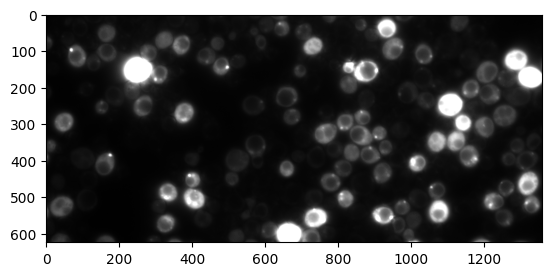

In [92]:
plt.imshow(cropped, cmap='gray')

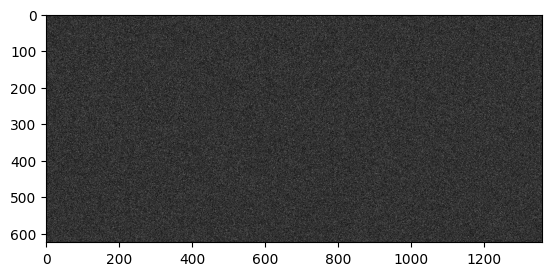

In [94]:
plt.imshow(noise_image, cmap='gray');

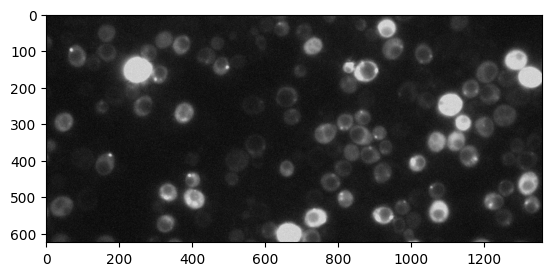

In [93]:
plt.imshow(corrupted, cmap='gray');

Esencialmente, puedes utilizar todas las operaciones matemáticas comunes con arreglos del mismo tamaño.


## Operaciones lógicas e indexación

El último tema importante concierne a las operaciones lógicas como $a > 3$. En Python básico, podemos usar este tipo de declaraciones:


In [95]:
a = 2

In [96]:
a > 3

False

In [97]:
a < 3

True

Vemos que la salida nos dice que la desigualdad es ```False``` o ```True```. De hecho, podemos asignar esta salida a una variable y verificar su tipo:


In [98]:
out = a > 3
out

False

In [99]:
type(out)

bool

Vemos que obtenemos una variable **boolean**. Booleano significa que esta es una variable que solo puede tomar dos valores: True o False (o 1 y 0). Ahora podemos hacer lo mismo con arreglos de Numpy:


In [100]:
cropped

array([[240, 252, 236, ..., 273, 281, 281],
       [241, 249, 258, ..., 270, 274, 263],
       [244, 247, 257, ..., 267, 273, 271],
       ...,
       [337, 343, 321, ..., 266, 287, 285],
       [320, 323, 339, ..., 268, 295, 281],
       [329, 353, 335, ..., 276, 281, 291]], dtype=uint16)

In [104]:
cropped < 950

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Vemos que la salida es nuevamente un arreglo de Numpy y que está lleno de valores ```True``` y ```False```: tenemos un **arreglo booleano**. Nuevamente, la comparación aquí se realizó **elemento por elemento**: cada píxel fue comparado con el valor 500 y el resultado se almacenó en un nuevo arreglo. Al igual que con un número simple, ahora podemos guardar este **arreglo booleano** como una variable:


In [135]:
array_bool = (cropped > 450) & (cropped < 900)


Como estamos trabajando con una imagen, lo que acabamos de hacer aquí es esencialmente **umbralización**: creamos una imagen binaria donde los píxeles indican ```True``` por encima del umbral de intensidad y ```False``` de lo contrario. ¡De hecho, podemos graficar el resultado!


In [136]:
array_bool

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

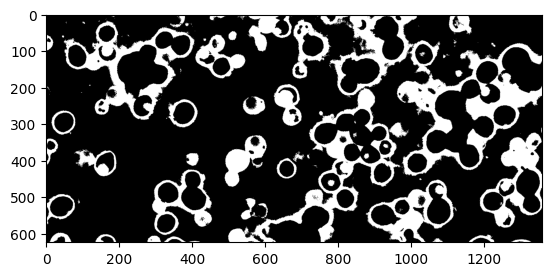

In [138]:
plt.imshow(array_bool, cmap='gray')

In [120]:
cropped[cropped > 450 ] = 200

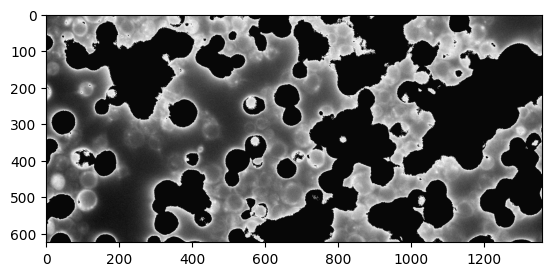

In [121]:
plt.imshow(cropped, cmap='gray');

Una operación muy importante que podemos usar ahora es combinar la imagen con el arreglo booleano **para extraer solo los valores ```True```** de la imagen. Puedes imaginarte usar el arreglo lógico como una máscara, superponiéndola sobre la imagen y extrayendo solo los píxeles que son visibles a través de las regiones blancas. El dibujo a continuación explica este concepto:


In [122]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg',width=700)

Esta operación se realiza pasando el arreglo booleano (el que usamos para indexar) a la imagen entre corchetes cuadrados:


In [133]:
cropped[array_bool]

array([452, 474, 465, ..., 496, 481, 474], dtype=uint16)

Como puedes ver, la salida es solo un arreglo unidimensional, una lista de números. Imagina que deseas estimar la intensidad promedio de fluorescencia en esas estructuras. Así es exactamente como procederíamos:

1. Encontrar los objetos de interés. Aquí lo hicimos mediante un umbral manual (poco adecuado).
2. Encontrar qué píxeles pertenecen a estos objetos. Esto se realiza aquí usando el **indexado lógico** `cropped[array_bool]`.
3. Finalmente, calcular la media de esos valores. Esto se puede lograr simplemente tomando la `mean` del arreglo anterior:


In [134]:
extracted_pixels = cropped[array_bool]
extracted_pixels.mean()

1210.5962677243874